<a href="https://colab.research.google.com/github/aiyufan3/AIPI-XAI-SHARP/blob/main/AIPI-XAI-Sharp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #01
### XAI interpretation with SHAP
### Yufan Ai

 https://github.com/aiyufan3/AIPI-XAI/tree/XAI-Sharp



# Introduction
#### The research "A Comprehensive Approach to Explainable AI: SHAP's Role in Modern Machine Learning" inspired this report by highlighting SHAP's importance in making complex machine learning models, like XGBoost, more interpretable [1]. The paper's insights into SHAP's effectiveness in uncovering feature importance and interactions directly influenced the analysis. **Explainable Artificial Intelligence (XAI)** is becoming increasingly used. Although complex models like **XGBoost** often have high predictive accuracy, the "black box" nature also faces considerable challenges in the real world [2]. The demostraction of code aims to use **SHAP (Shapley Additive Explanations)**, a tool for explaining model predictions, to elucidate the internal mechanisms of the XGBoost model trained on the **California Housing Dataset** from scikit-learn. By examining various **SHAP visualizations**, this report aims to provide a foundational understanding of how different features affect the interaction of model predictions.





---






#Data Loading and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from ipywidgets import interact

# Initialize SHAP
shap.initjs()

# Load California housing dataset from scikit-learn dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Model Training

**Train a Model Using XGBoost**

In [ ]:
# Train model on polynomial features
model_poly = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, random_state=42)
model_poly.fit(X_train_poly, y_train)
# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error with Polynomial Features: {mse_poly}')

Mean Squared Error with Polynomial Features: 0.23585742972990395


# SHAP Explanation
**SHAP values** are calculated for each feature, explaining their contribution to the model’s predictions. Visualization is provided both locally (individual predictions) and globally (overall feature importance).

**Apply SHAP for Model Explanation**

In [ ]:
# SHAP analysis
explainer = shap.TreeExplainer(model_poly)
shap_values = explainer.shap_values(X_test_poly)
shap.initjs()

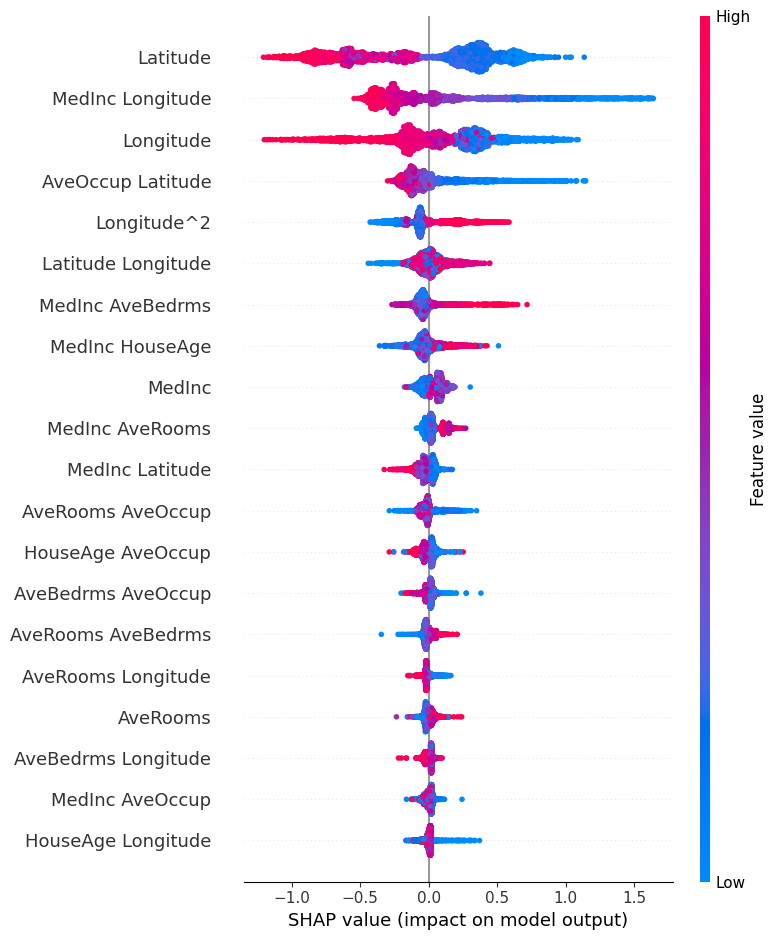

In [ ]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out(X.columns))

**Latitude, MedInc Longitude, and Longitude** are shown to have the greatest influence on housing prices. The variation in SHAP values for each feature across the dataset reflects how consistently these features impact the model's predictions.

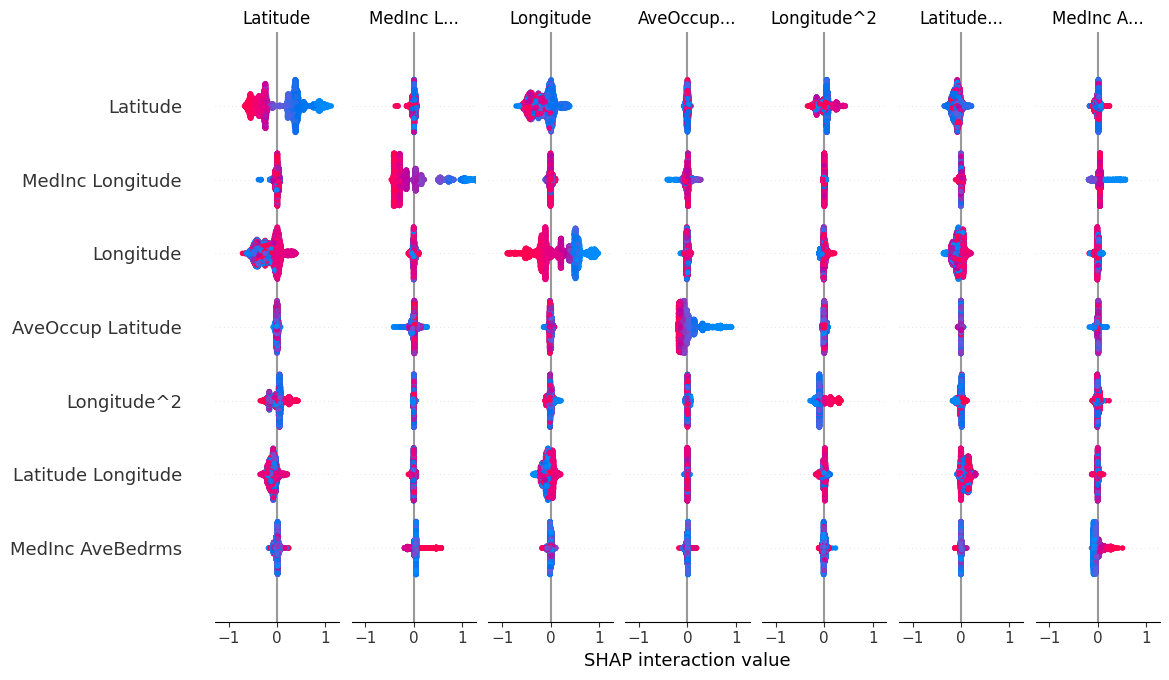

In [ ]:
# SHAP interaction summary plot
shap_interaction_values = explainer.shap_interaction_values(X_test_poly)
shap.summary_plot(shap_interaction_values, X_test_poly, feature_names=poly.get_feature_names_out(X.columns))

*The strong interaction between Latitude and Longitude suggests that geographic location is a key determinant of housing prices.
This plot helps uncover complex, non-linear relationships that might be missed when looking at features in isolation.*

In [ ]:
#print feature name for future use on the interaction process for next step of dependency plot
for name in zip(feature_names):
    print(f"Feature: {name}")

Feature: ('MedInc',)
Feature: ('HouseAge',)
Feature: ('AveRooms',)
Feature: ('AveBedrms',)
Feature: ('Population',)
Feature: ('AveOccup',)
Feature: ('Latitude',)
Feature: ('Longitude',)
Feature: ('MedInc^2',)
Feature: ('MedInc HouseAge',)
Feature: ('MedInc AveRooms',)
Feature: ('MedInc AveBedrms',)
Feature: ('MedInc Population',)
Feature: ('MedInc AveOccup',)
Feature: ('MedInc Latitude',)
Feature: ('MedInc Longitude',)
Feature: ('HouseAge^2',)
Feature: ('HouseAge AveRooms',)
Feature: ('HouseAge AveBedrms',)
Feature: ('HouseAge Population',)
Feature: ('HouseAge AveOccup',)
Feature: ('HouseAge Latitude',)
Feature: ('HouseAge Longitude',)
Feature: ('AveRooms^2',)
Feature: ('AveRooms AveBedrms',)
Feature: ('AveRooms Population',)
Feature: ('AveRooms AveOccup',)
Feature: ('AveRooms Latitude',)
Feature: ('AveRooms Longitude',)
Feature: ('AveBedrms^2',)
Feature: ('AveBedrms Population',)
Feature: ('AveBedrms AveOccup',)
Feature: ('AveBedrms Latitude',)
Feature: ('AveBedrms Longitude',)
Featur

*MedInc is the the 1st feature which is feature[0], change the index for analyze using of different features' interation*

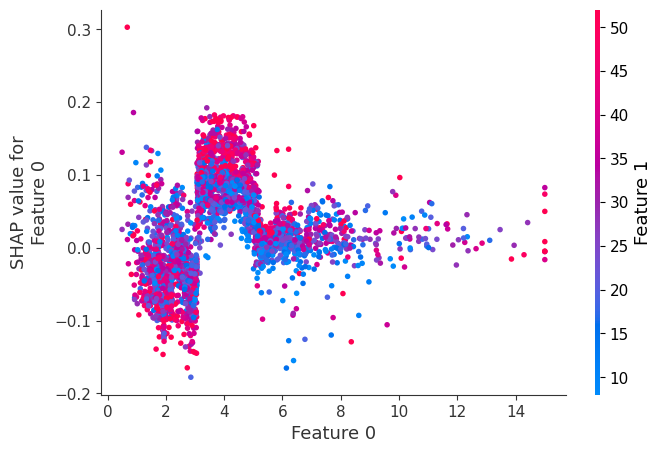

In [ ]:
# SHAP dependence plot
feature_names = poly.get_feature_names_out(X.columns)
house_age_index = list(feature_names).index('HouseAge')
#Relationship between MedInc and HouseAge
# Use the correct variable name for the feature, and ensure it hasn't been overwritten
shap.dependence_plot(0, shap_values, X_test_poly, interaction_index=house_age_index)

*A basic relationship shows between Median Income (MedInc) and HouseAge significantly shapes the model’s output. This plot is crucial for understanding how features work together to influence predictions.*

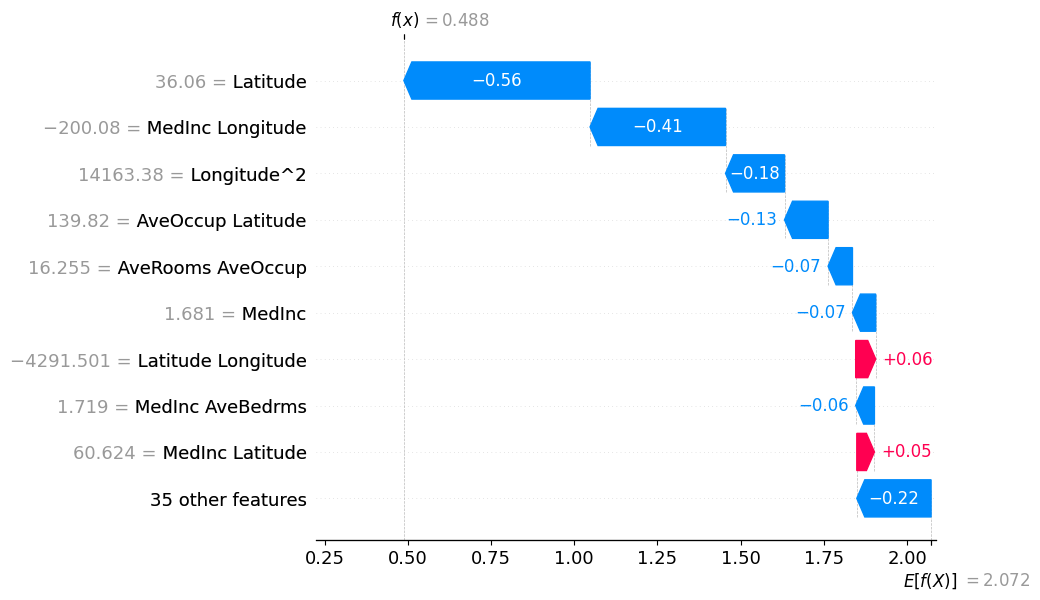

In [ ]:
# Interactive SHAP waterfall plot
def plot_shap_waterfall(instance_index):
    shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index],
                                         base_values=explainer.expected_value,
                                         data=X_test_poly[instance_index],
                                         feature_names=feature_names))

plot_shap_waterfall(0)  # Plot waterfall for the first instance in X_test_poly

*In a specific instance, features like Latitude and MedInc Longitude negatively impact the predicted housing price, while others like MedInc AveBedrms contribute positively.*

# Conclusion

**Transparent explanations** of model predictions foster trust among stakeholders and promote responsible use of AI technologies. This report demonstrates the application of **XAI**, specifically **SHapley Additive exPlanations** (SHAP), to elucidate the predictions of machine learning models. An XGBoost regression model is trained on the **California Housing Dataset** to predict housing prices based on various features to ensure transparency and explainability of decisions. The report includes various **SHAP visualizations** such as **summary plots, dependency plots, interaction plots, and waterfall plots** to interpret the importance of interactions and features in XAI learning. As AI continues to advance, tools like SHAP will play a crucial role in ensuring that these technologies are applied ethically and effectively.



# Reference

[1] Baek, S., Park, H., & Seo, Y. (2024). A Comprehensive Approach to Explainable AI: SHAP's Role in Modern Machine Learning. *Artificial Intelligence Systems*, Wiley. https://doi.org/10.1002/aisy.202400304


[2] Idit C. (2023). Explainable AI (XAI) with SHAP - regression problem. GitHub. https://github.com/Iditc/Posts-on-Medium/blob/main/Explainable%20AI/Explainable%20AI%20(XAI)%20with%20SHAP%20-%20regression%20problem.ipynb


[3] Sharp. (2018) An introduction to explainable AI with Shapley values
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html